# **Welcome to the Python Workshop! Here is your starter code**


### Try out hello world below! It's easy I promise.

In [14]:
print("Hello World")

Hello World


## What are we analyzing? 

We're going to be looking at the sales numbers over a 5 year period of batmobiles for Wayne Enterprises. We can see that data below here, press ctrl+enter in the code block to run it!

In [15]:
import pandas as pd

sales = [455, 495, 516, 570, 575]
years = [1,2,3,4,5]

df = pd.DataFrame({'Total Sales($)':sales, 'Year':years})
df

,Total Sales($),Year
0,455,1
1,495,2
2,516,3
3,570,4
4,575,5


## Let's do some simple math! In the blocks below, try your hand at calculating the mean, variance and standard deviation.

Feel free to comment out the code and see how easy it is to work in python.

In [16]:
def calcMean(data):
    totalSum = sum(sales)
    numTotal = len(sales)
    mean = totalSum/numTotal
    return mean

calcMean(sales)

522.2

In [17]:
def calcVariance(data):
    mean = calcMean(data)
    var  = (sum(pow(x-mean,2) for x in sales)) / len(sales) 
    return var

foundVar = calcVariance(sales)
print(foundVar)

2073.36


In [18]:
import math

def calcStd(varianceData):
    std  = math.sqrt(calcVariance(varianceData)) 
    return std

print(calcStd(foundVar))

45.53416299878587


## We can make it easier than that! 

The above was the beauty of python, easy to work with and follow along. But we can make the calculations easier than that!

Enter numpy!

In [19]:
import numpy as np

np.mean(sales)

522.2

In [20]:
np.var(sales)

2073.36

In [21]:
np.std(sales)

45.53416299878587

## What about linear regression?

Here's the formula as a refresher

![](https://i.imgur.com/B8s3CCI.png)

And to find a and b we have to do the following:

![](https://www.statisticshowto.com/wp-content/uploads/2009/11/linearregressionequations.bmp)


 Little bit more dicey right? Yeah it sucks.





## Here's the quick and easy alternative...

In [22]:
linregressModel = np.polyfit(years, sales, 1)
slope = linregressModel[0]
intercept = linregressModel[1]
print("slope: %f    intercept: %f" % (linregressModel[0], linregressModel[1]))

slope: 31.500000    intercept: 427.700000


In [23]:
modelPredictions = np.polyval(linregressModel, years)
absError = modelPredictions - sales

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(sales)) 

print('RMSE:', RMSE)
print('R-squared:', Rsquared)

RMSE: 9.426558226627588
R-squared: 0.957142030327584


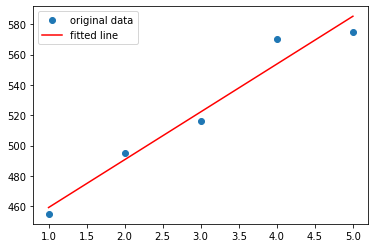

In [24]:
import matplotlib.pyplot as plt

x = np.array(years)
y = np.array(sales)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## What if we wanted to predict the sales in the future?

Well that's easy! We can just use the linear regression model we have above to predict for year 6 for example. 

Feel free to change the yearToPredict!

In [25]:
yearToPredict = 6

predict = np.poly1d(linregressModel)
predictedSale = predict(yearToPredict)

x_new = np.array([yearToPredict])
y_new = np.array([predictedSale])

print(predictedSale)

616.6999999999999


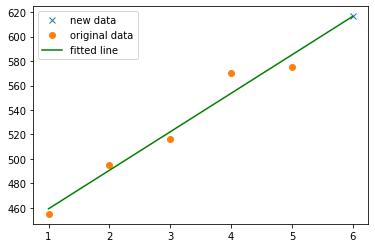

In [26]:
xFull = np.append(x, x_new)

plt.plot(x_new, y_new, 'x', label='new data')
plt.plot(x, y, 'o', label='original data')
plt.plot(xFull, intercept + slope*xFull, 'g', label='fitted line')
plt.legend()
plt.show()

## Report Building

Now that you have all this work done, you might want to show it to someone or share it with other people. All you have to do is go to File in the top left corner and click Download as. You can choose what format you want and you're set!